In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import classification_report
from keras import datasets
from scipy.misc import imresize
from keras.models import Model

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
y_true = y_test

In [3]:
# parsing through the dataset

img_row, img_cols = 28, 28
input_shape = (img_row, img_cols, 1)

x_train = x_train.reshape(x_train.shape[0], img_cols, img_row, 1)
x_test = x_test.reshape(x_test.shape[0], img_cols, img_row, 1)

print("Train set shape", x_train.shape, 'trainlabel shape', y_train.shape)
print('test set shape', x_test.shape, 'test labels:', y_test.shape)

Train set shape (60000, 28, 28, 1) trainlabel shape (60000,)
test set shape (10000, 28, 28, 1) test labels: (10000,)


In [4]:
# split the train set to validatation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

print('X_train shape:', x_train.shape, 'X_label shape:', y_train.shape)
print('Val_set shape:', x_val.shape, 'val_label shape:', y_val.shape)
print('Test_set shape:', x_test.shape, 'y_test shape:', y_test.shape)

X_train shape: (48000, 28, 28, 1) X_label shape: (48000,)
Val_set shape: (12000, 28, 28, 1) val_label shape: (12000,)
Test_set shape: (10000, 28, 28, 1) y_test shape: (10000,)


In [5]:
# normalization of data
x_train = (x_train - x_train.mean()) / x_train.std()
x_val = (x_val - x_val.mean()) / x_val.std()
x_test = (x_test - x_test.mean()) / x_test.std()

In [6]:
num_labels = 10
# formatting the data for model input
im_row = 227
im_col = 227

def reformat(dataset):
    dataset = np.asarray([img_to_array(array_to_img(im, scale=False).resize((im_row, im_col))) for im in dataset])
    return dataset

y_train = keras.utils.to_categorical(y_train)
x_train  = reformat(x_train)
print('X_train shape:', x_train.shape, 'X_label shape:', y_train.shape)

y_test = keras.utils.to_categorical(y_test)
x_test  = reformat(x_test)
print('test set shape:', x_test.shape, 'test label shape', y_test.shape)

y_val = keras.utils.to_categorical(y_val)
x_val  = reformat(x_val)
print('val set shape:', x_val.shape, 'val_lavels shape:', y_val.shape)

X_train shape: (48000, 227, 227, 1) X_label shape: (48000, 10)
test set shape: (10000, 227, 227, 1) test label shape (10000, 10)
val set shape: (12000, 227, 227, 1) val_lavels shape: (12000, 10)


# AlexNet Architecture

In [7]:
# Defining AlexNet architecture

batch_size = 32
num_classes = 10
epochs = 50

model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(227,227,1), kernel_size=(11, 11), strides=(4, 4), activation='relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Passing it to a Fully Connected layer
model.add(Flatten())

# 1st Fully Connected Layer
model.add(Dense(4096, activation='relu'))

# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(4096, activation='relu'))

# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(1000, activation='relu'))

# Add Dropout
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy']) 

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 55, 55, 96)        11712     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 384)         885120    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 384)         1327488   
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 5, 256)         884992    
__________

In [9]:
hist = model.fit(x_train, y_train, batch_size= batch_size, epochs= epochs, verbose=1, validation_data=(x_val,y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/1
48000/48000 [==============================] - 3572s 74ms/step - loss: 0.3141 - acc: 0.9019 - val_loss: 0.1562 - val_acc: 0.9568


In [10]:
score = model.evaluate(x_test, y_test, verbose= 1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 169s 17ms/step
Test loss: 0.14832029934376478
Test accuracy: 0.9602


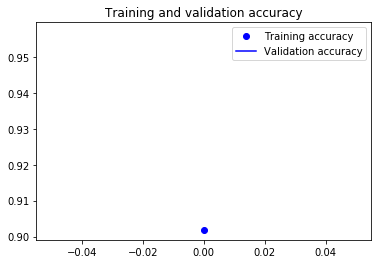

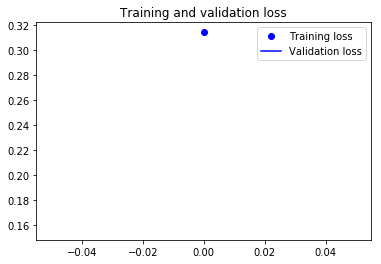

In [11]:
accuracy = hist.history['acc']
val_accuracy = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [12]:
#get the predictions for the test data
predicted_classes = model.predict_classes(x_test)

#get the indices to be plotted
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [13]:
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.97      0.98      0.98       980
     Class 1       0.99      0.98      0.98      1135
     Class 2       0.99      0.88      0.93      1032
     Class 3       0.98      0.98      0.98      1010
     Class 4       1.00      0.93      0.96       982
     Class 5       0.92      0.99      0.95       892
     Class 6       0.99      0.97      0.98       958
     Class 7       0.96      0.98      0.97      1028
     Class 8       0.87      0.99      0.92       974
     Class 9       0.95      0.94      0.94      1009

   micro avg       0.96      0.96      0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



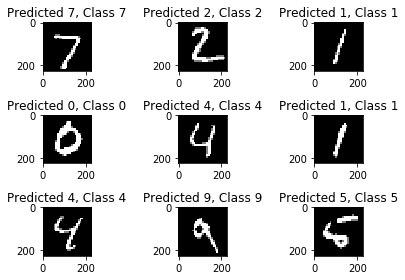

In [15]:
for i, c in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[c].reshape(227,227), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[c], y_true[c]))
    plt.tight_layout()

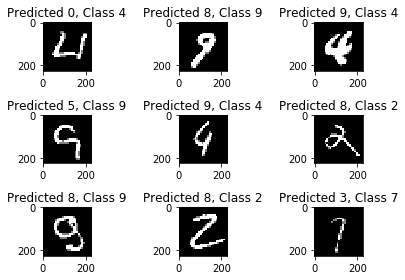

In [17]:
for i, inc in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[inc].reshape(227,227), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[inc], y_true[inc]))
    plt.tight_layout()

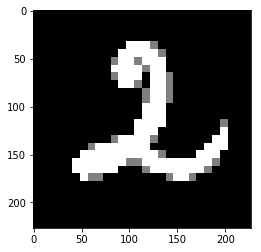

In [20]:
test_img = x_train[131]
plt.imshow(test_img.reshape(227,227), cmap='gray', interpolation='none')
plt.show()